# Customer Churn Prediction - EDA
Status: In Progress


In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\eenaa\Downloads\DS PROJECTS\customer-churn-statistical-learning\data\churn.csv')
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()          # Data types, non-null counts
df.describe()      # Summary statistics for numerical columns
df.isnull().sum()  # Check missing values
df['Churn'].value_counts()  # Distribution of target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

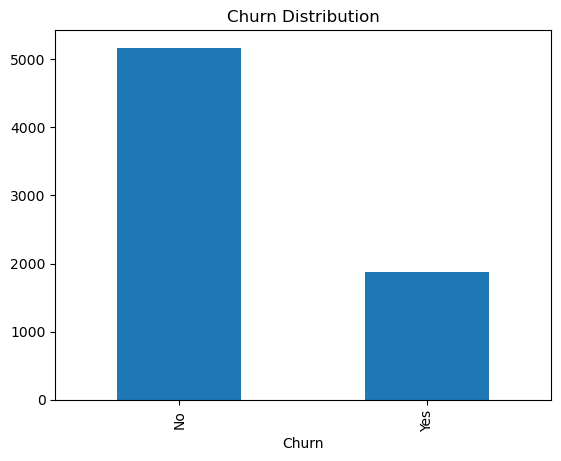

In [3]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.show()
import seaborn as sns

In [4]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(df[col].value_counts())
    print('------')


customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
------
gender
Male      3555
Female    3488
Name: count, dtype: int64
------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
------
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------


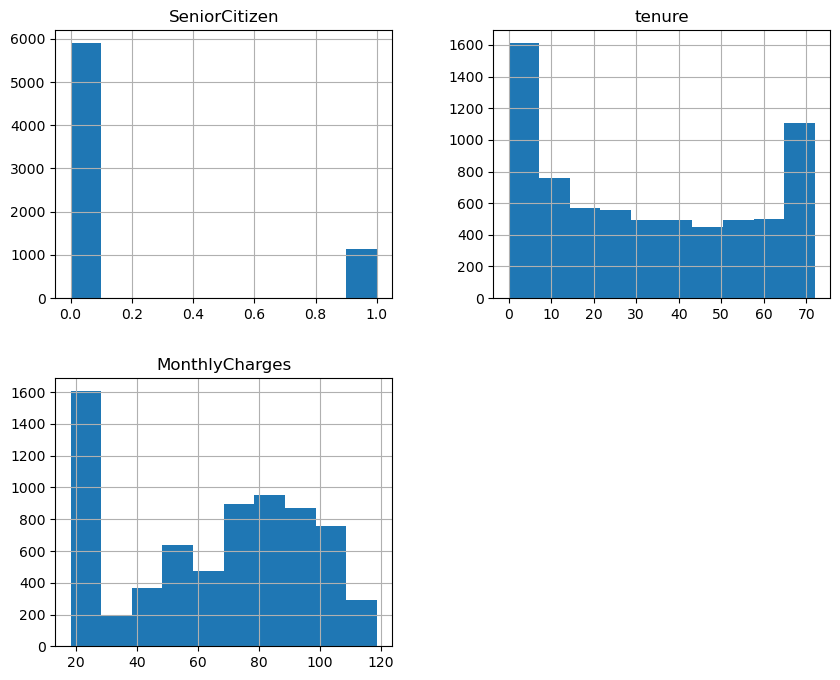

In [5]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(10,8))
plt.show()


Observation: Most customers do not churn. Tenure shows a right-skewed distribution. Monthly charges vary widely, which may affect churn.
